<a href="https://colab.research.google.com/github/Nichlas0403/DL_Binary_Classification_Stroke/blob/main/Stroke_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recap of the notebook

**Goal**<br>
The Goal of this notebook is to predict wether or not a given person, is in danger of being the victim of a stroke in the future. To achieve this I will be creating an artificial neural network. As this project is purely for studying, I will not be setting an acceptence-goal. I will however still try to create an accuracte model.

**NOTE:**<br>
I've just learned the technique SMOTE. The first part of the modelling-phase will be trying to apply a machine learning model on a heavily imbalanced dataset. In the second part I will apply SMOTE before training the ANN.

**Dataset**<br>
The data has been found on data: <br>
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

**Features**<br>
Features in this dataset includes: <br>
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

**NOTE**: "Unknown" in smoking_status means that the information is unavailable for this patient

#Preperation

In [765]:
#Import baseline tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import keras
import tensorflow as tf

In [766]:
#Import data
df_baseline = pd.read_csv("/content/drive/MyDrive/Data Science, Machine Learning/Colab Notebooks/Deep Learning Projects/Classification/Stroke Binary Classification/healthcare-dataset-stroke-data.csv")
df = df_baseline
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#DEA

##Baseline information

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [768]:
X_values = df.columns
X_values

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [769]:
y_values = []

for column in X_values:
  y_values.append(df[column].count())

y_values

[5110, 5110, 5110, 5110, 5110, 5110, 5110, 5110, 5110, 4909, 5110, 5110]

<BarContainer object of 12 artists>

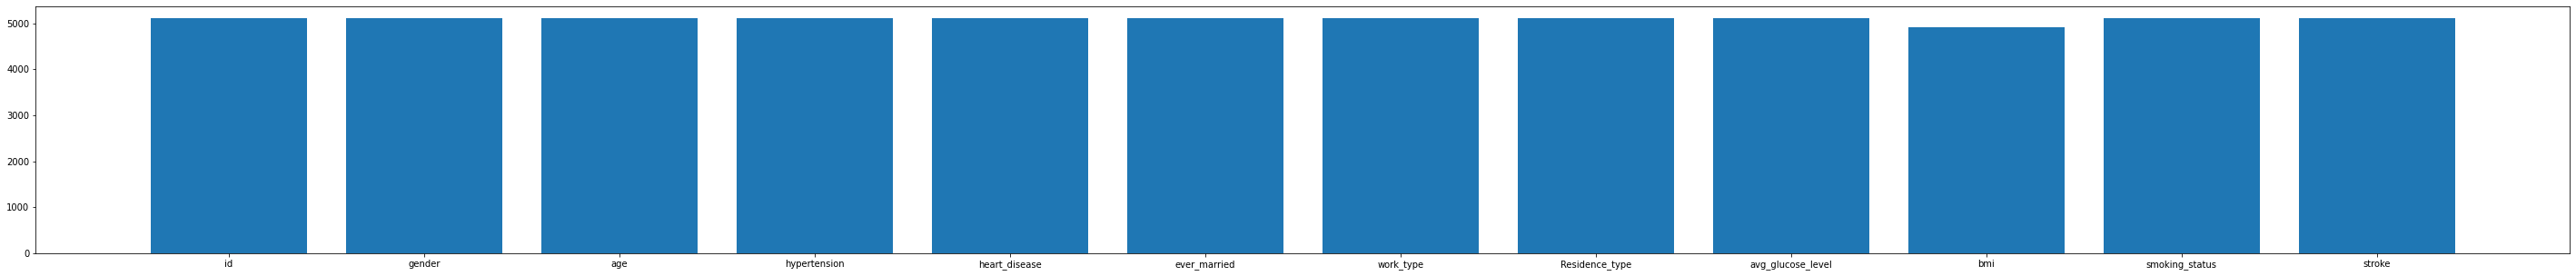

In [770]:
fig, ax = plt.subplots(figsize=(50,5))
ax.bar(X_values,y_values)

## Value-count of gender-, age- and stroke-columns

In [771]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

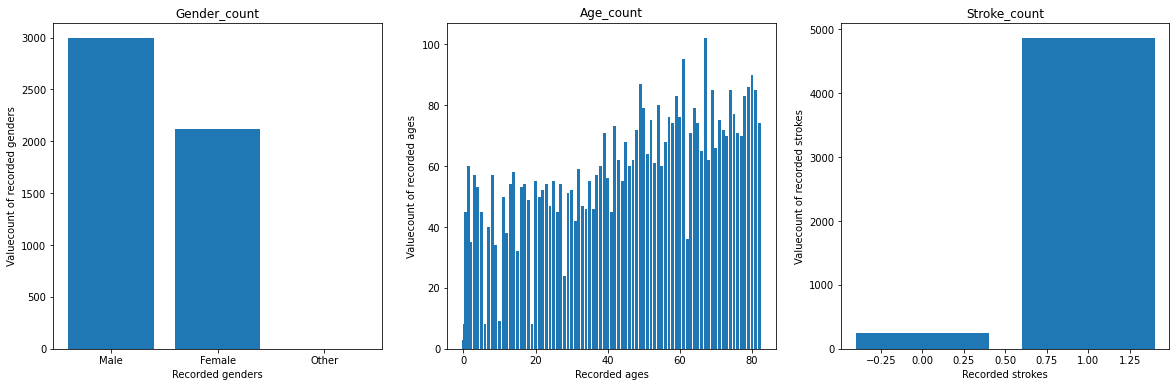

In [772]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,
                                  ncols=3,
                                  figsize=(20,6))

ax1.set(title="Gender_count",
        xlabel="Recorded genders",
        ylabel="Valuecount of recorded genders")
ax1.bar(df["gender"].unique(),
        df["gender"].value_counts())

ax2.set(title="Age_count",
        xlabel="Recorded ages",
        ylabel="Valuecount of recorded ages")
ax2.bar(df["age"].unique(),
        df["age"].value_counts())

ax3.set(title="Stroke_count",
        xlabel="Recorded strokes",
        ylabel="Valuecount of recorded strokes")
ax3.bar(df["stroke"].unique(),
        df["stroke"].value_counts());

**Thoughts about the plots above:**<br>
- Gender-column is somewhat balanced <br>
- Stroke-column - the majority of the samples in this columns haven't had a stroke. <br>
- Age-column is somewhat balanced, but with a higher count towards the higher ages - if age and stroke correlates, it might be the reason to why the majority of the stroke samples are positive. I will check if this correlation exist now

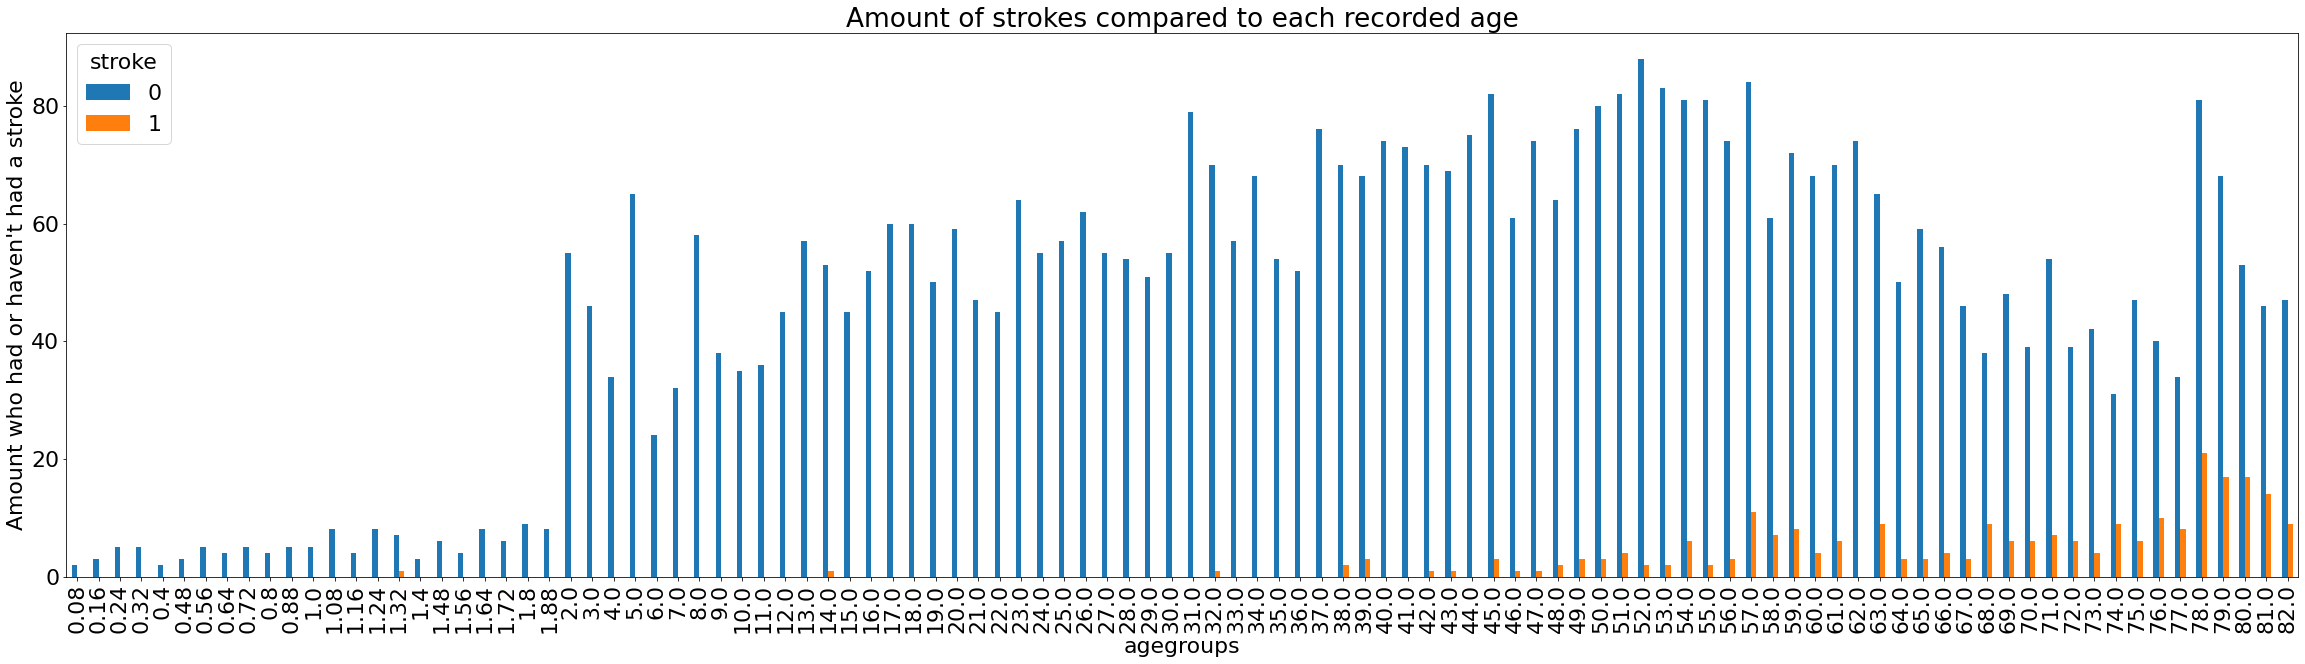

In [773]:
plt.rcParams.update({'font.size': 22})
pd.crosstab(df["age"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Amount of strokes compared to each recorded age");
plt.xlabel("agegroups");
plt.ylabel("Amount who had or haven't had a stroke");

##Compare heart-disease- smoking_status- and stroke-column to eachother

###Compare heart-disease with stroke-column

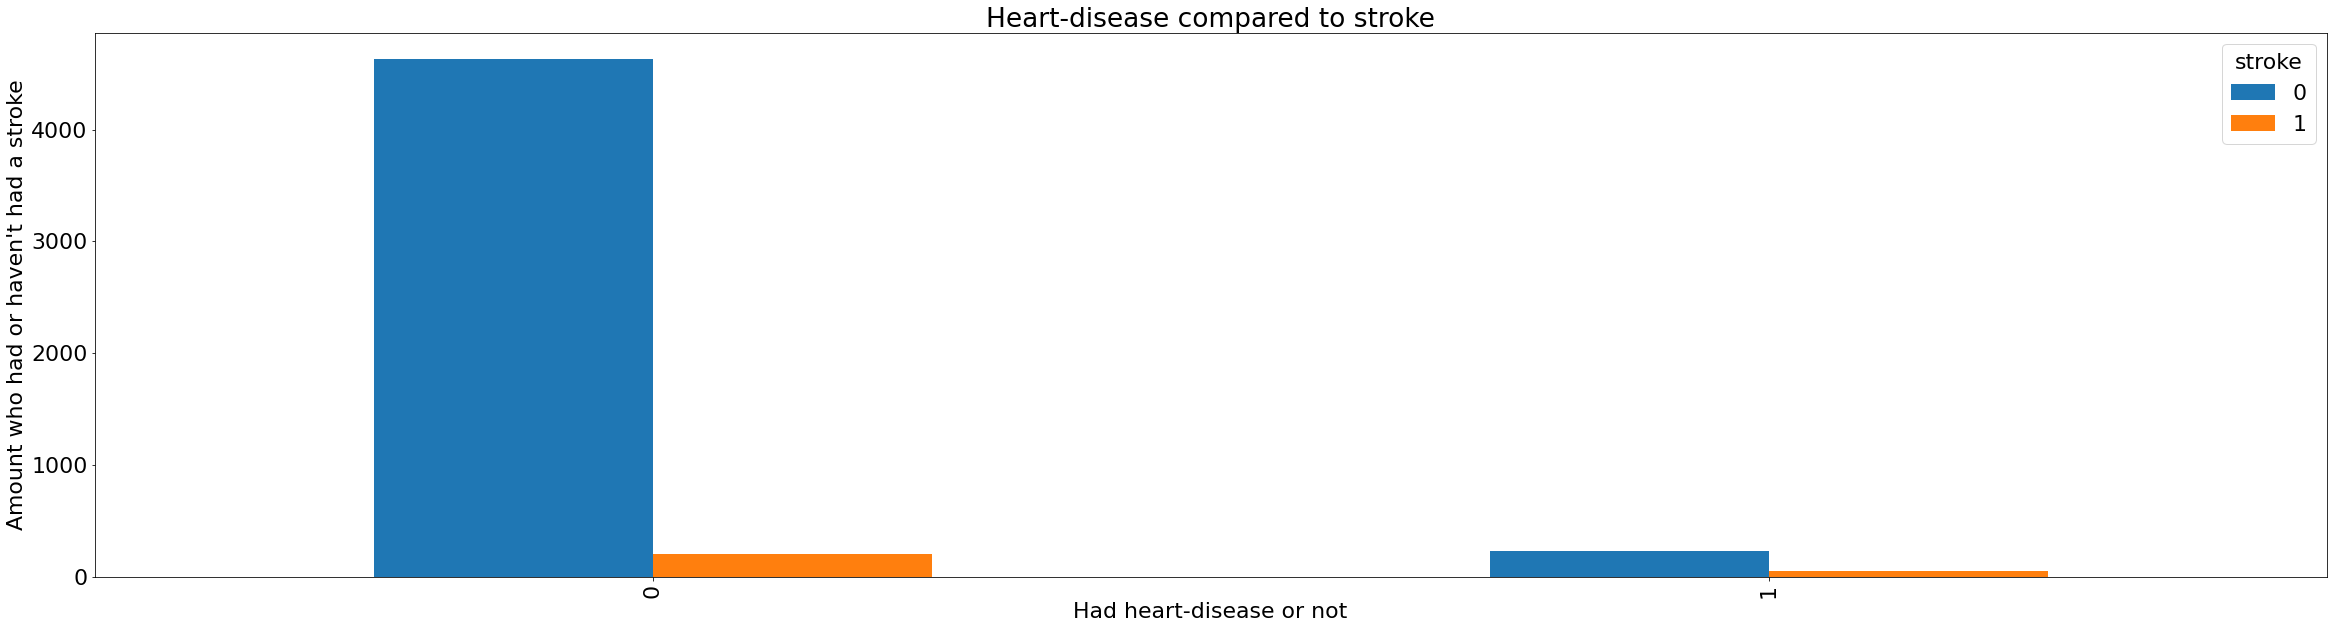

In [774]:
pd.crosstab(df["heart_disease"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Heart-disease compared to stroke");
plt.xlabel("Had heart-disease or not");
plt.ylabel("Amount who had or haven't had a stroke");

## Compare smoking_status with stroke-column

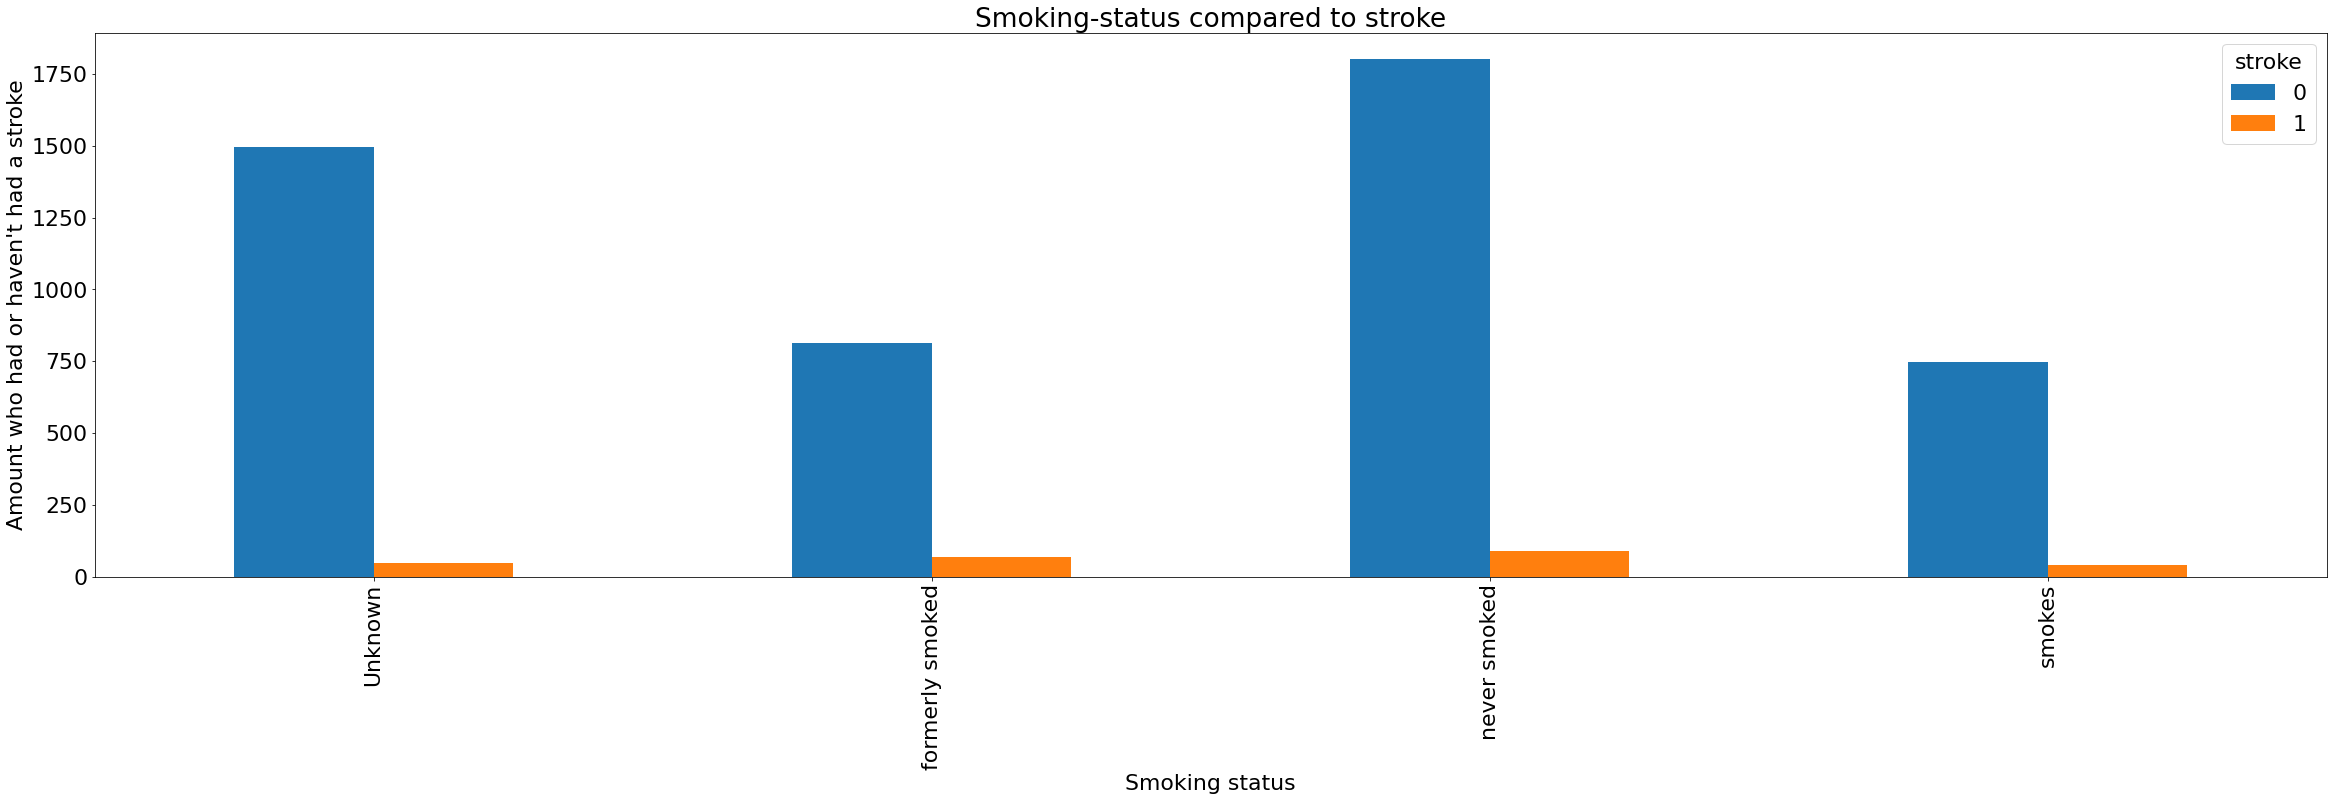

In [775]:
pd.crosstab(df["smoking_status"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Smoking-status compared to stroke");
plt.xlabel("Smoking status");
plt.ylabel("Amount who had or haven't had a stroke");

###Conclusion on plots above

**Heart-disease**<br>
At a first glance, it looks like we simply don't have enough occurences of people having a stroke, to make an assumption to wether or not heart-disease have a strong correlation to strokes. However, if we take a closer look, we can see that if we compare the amount of strokes that happened to people who either had or didn't have a heart disease, the number of stroke-occurences on both sides are actually relatively close. Therefore, if the amount of strokes that happened to people with a heart-disease that fast can sneak up to the amount of people who didn't have a heart-disease, there must be correlation.

**Smoke-status**<br>
The situation here is the same as described above. The amount of people who had a stroke, and either are non-smokers, formerly-smokers or currenct-smokers are very close. Yet the amount of people who do not smoke at all are very high. Therefore, there must be a correlation.


##Compare Hypertension and avg_glucose_level to stroke

**Hyptertension is high blood presure**

###Hyptertension compared to stroke

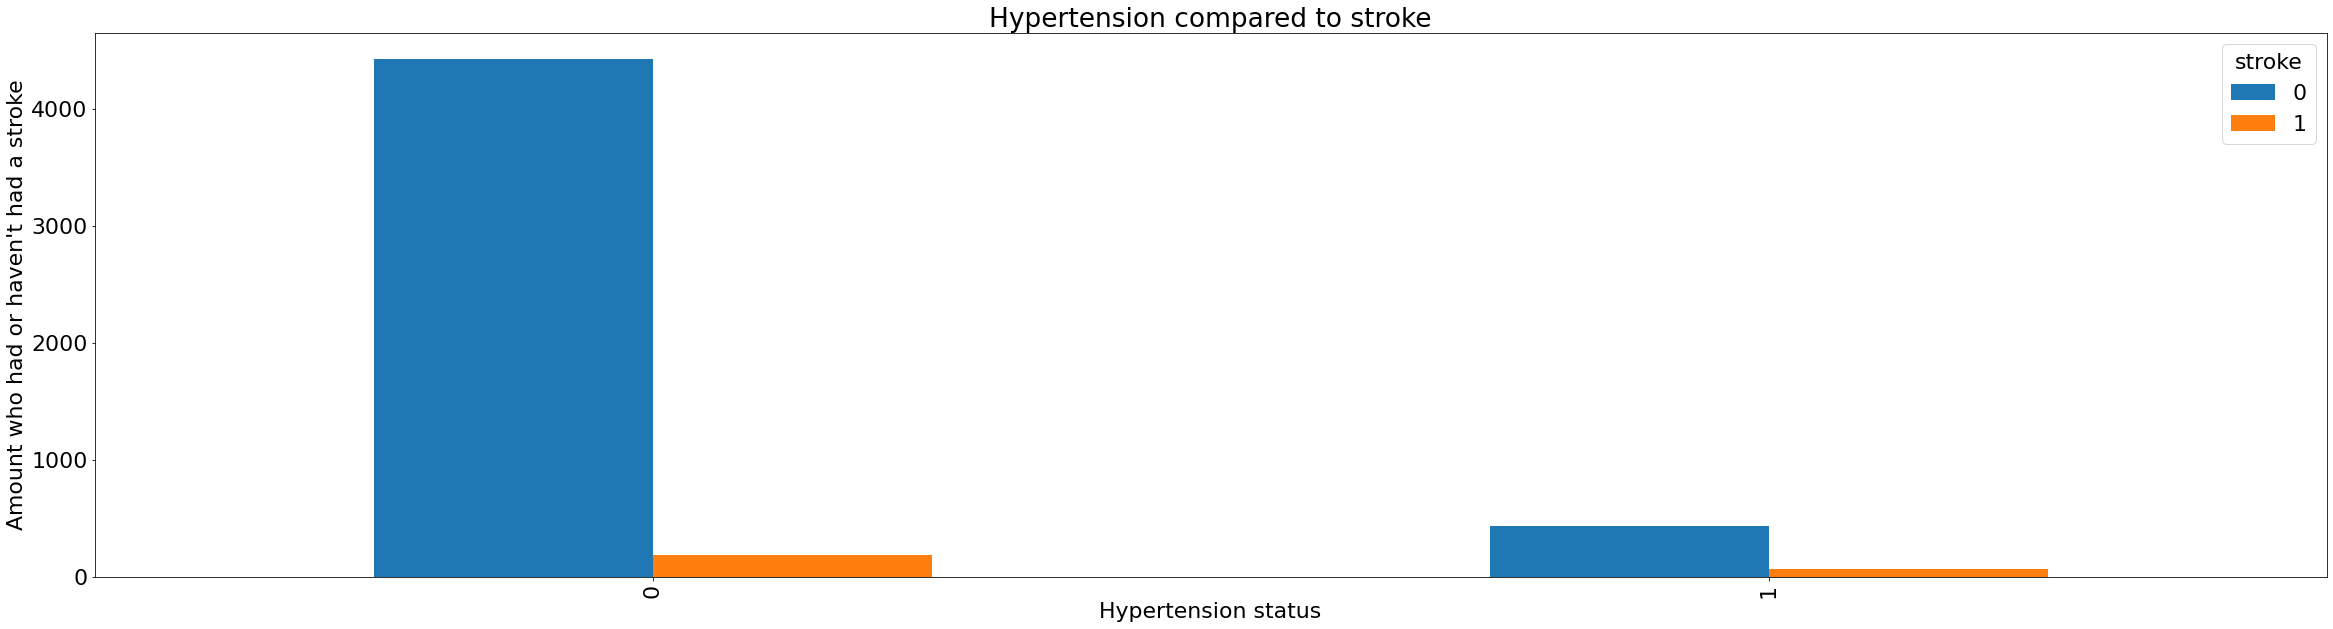

In [776]:
pd.crosstab(df["hypertension"],df["stroke"]).plot(kind="bar",
                                         figsize=(40,10))

plt.title("Hypertension compared to stroke");
plt.xlabel("Hypertension status");
plt.ylabel("Amount who had or haven't had a stroke");

###Avg_glucose_level compared to stroke

In [777]:
print(df["avg_glucose_level"].min())
print(df["avg_glucose_level"].max())

55.12
271.74


In [778]:
glucose_threshold = {"50-89":  [],
                     "90-129": [],
                     "130-169":[],
                     "170-209":[],
                     "210-239":[],
                     "240-279":[]}

for sample in range(len(df)):
  if df.iloc[sample]["avg_glucose_level"] >= 50 and df.iloc[sample]["avg_glucose_level"] < 90:
   glucose_threshold["50-89"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 90 and df.iloc[sample]["avg_glucose_level"] < 130:
    glucose_threshold["90-129"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 130 and df.iloc[sample]["avg_glucose_level"] < 170:
    glucose_threshold["130-169"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 170 and df.iloc[sample]["avg_glucose_level"] < 210:
    glucose_threshold["170-209"].append(df.iloc[sample]["stroke"])

  elif df.iloc[sample]["avg_glucose_level"] >= 210 and df.iloc[sample]["avg_glucose_level"] < 239:
    glucose_threshold["210-239"].append(df.iloc[sample]["stroke"])
  
  elif df.iloc[sample]["avg_glucose_level"] >= 240 and df.iloc[sample]["avg_glucose_level"] < 279:
    glucose_threshold["240-279"].append(df.iloc[sample]["stroke"])

In [779]:
glucose_threshold["50-89"] = pd.Series(glucose_threshold["50-89"]).value_counts()
glucose_threshold["90-129"] = pd.Series(glucose_threshold["90-129"]).value_counts()
glucose_threshold["130-169"] = pd.Series(glucose_threshold["130-169"]).value_counts()
glucose_threshold["170-209"] = pd.Series(glucose_threshold["170-209"]).value_counts()
glucose_threshold["210-239"] = pd.Series(glucose_threshold["210-239"]).value_counts()
glucose_threshold["240-279"] = pd.Series(glucose_threshold["240-279"]).value_counts()

In [780]:
glucose_data = {"50-89_false":glucose_threshold["50-89"][0],
                "50-89_true":glucose_threshold["50-89"][1],
                "90-129_false":glucose_threshold["90-129"][0],
                "90-129_true":glucose_threshold["90-129"][1],
                "130-169_false":glucose_threshold["130-169"][0],
                "130-169_true":glucose_threshold["130-169"][1],
                "170-209_false":glucose_threshold["170-209"][0],
                "170-209_true":glucose_threshold["170-209"][1],
                "210-239_false":glucose_threshold["210-239"][0],
                "210-239_true":glucose_threshold["210-239"][1],
                "240-279_false":glucose_threshold["240-279"][0],
                "240-279_true":glucose_threshold["240-279"][1]}

[Text(0, 0.5, 'Amount recorded'),
 Text(0.5, 0, 'avg_glucose_level-interval and stroke bool for the interval'),
 Text(0.5, 1.0, 'avg_glucose_level compared to stroke occurrence')]

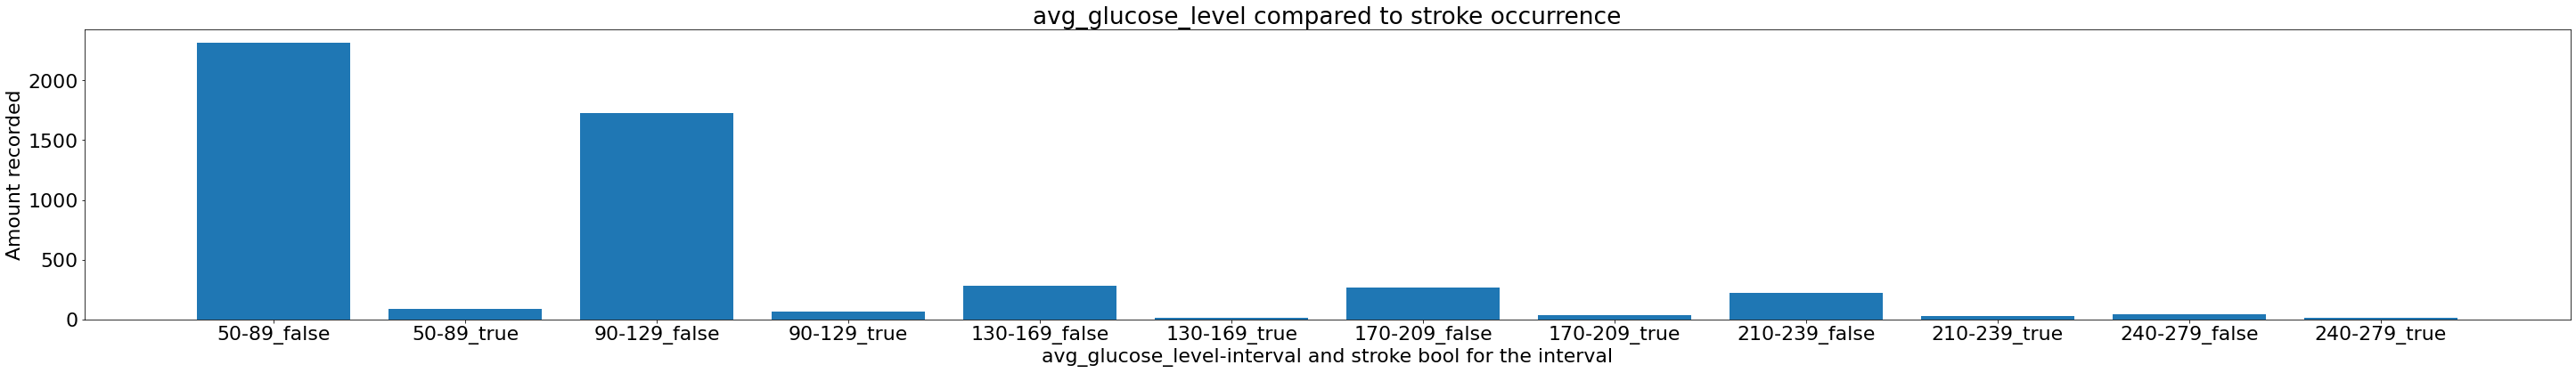

In [781]:
fig, ax = plt.subplots(figsize=(50,6))

ax.bar(glucose_data.keys(),
       glucose_data.values())

ax.set(title="avg_glucose_level compared to stroke occurrence",
       xlabel="avg_glucose_level-interval and stroke bool for the interval",
       ylabel="Amount recorded")

### Conclusion on plots above

Both avg_clucose_level and heart_disease clearly correlates to the occurence of heart attack (that is, if the theory mentioned at the first few plots is correct)

#Data preperation

##Data removal

###Remove Uncesseray columns

####ID

I need to check wether or not the same ID's occurs multiple time. If they do, there might be some data patterns related to them. If each ID only occurs once I will remove them.

In [782]:
len(df["id"].value_counts())

5110

In [783]:
len(df)

5110

In [784]:
#We have 4909 unique ID's in a dataset with a length of 4909. Each ID only occurs
#once, so I will remove them.

df = df.drop("id",axis=1)

In [785]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


####Thoughts about BMI

In this dataset, the BMI is the only way of analyzing each samples corrilation of height and weights - therefore it's an important feature. The problem with BMI is, that it is calculated as: 

BMI = weight(kg)/height(m)^2. 

It doesn not take into account, that the majority of the weight might either be fat or musclemass. In that regard, BMI cannot tell us wether a person is healthy or not without looking at their workout rutine. Because of this, we might have samples with a high BMI, but of which the person the sample belongs to, is highly active have a lot of muscle mass. If that person suffers from a heart attack, it most likely will not be because of the BMI, however, the machine learning model doesn't have any way of know that. 

I have decided to let the BMI stay, because the majority of the samples lie in an age-group, where people usually don't spend most of their time doing bodybuilding. If the model ends up being unaccurate, one of the first changes I might make is to make some sort of change to the BMI-column.

In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##Deal with NaN

####BMI

The only missing values belong to the bmi-column. As usualy with NaN, there are two options: remove the samples, or fill out the NaN with something else.

Since bmi is a calculation based on height and weights, and since height and weights correlates to age (of which I have a wide range of in this dataset), I have decided to remove the samples i which bmi is NaN.

I could've splitted samples into age-groups, and then iterate through the age-groups and fill out the NaN-bmi with the mean of the bmi within that age-group - this would've been a solution if a majority of the samples in the BMI-column was NaN. But since it's only 200 samples out of the 5100, I will remove them instead.

In [787]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [788]:
df.dropna(inplace=True)

In [789]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###Thoughs about gender-column

During the DEA, the gender-plot showed there's a section called "other". However, it looked like a very small amount of samples belonged to that category. I will find the specific value_count and most likely remove the samples which belongs to that category.

In [790]:
df["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [791]:
df = df[df["gender"] != "Other"]

In [792]:
df["gender"].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [793]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


##Split data into X and y

In [794]:
X = df.drop("stroke",axis=1)
y=df["stroke"]

In [795]:
X[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [796]:
y[:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [797]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 421.8+ KB


##Deal with non-numerical values

As shown below, we have the following columns which fall under the "object" datatype:

- gender
- ever_married
- work_type
- Residence_type
- smoking_status

Depending on the value_counts() for each feature, I will either use label encoding on the features with binary-values or one-hot encoding on the features with multiple values.

In [798]:
object_columns = ["gender","ever_married","work_type","Residence_type","smoking_status"]
binary_features = []
multiple_features = []

for column in object_columns:
  if len(df[column].value_counts()) == 2:
    binary_features.append(column)
  else:
    multiple_features.append(column)

In [799]:
binary_features

['gender', 'ever_married', 'Residence_type']

In [800]:
multiple_features

['work_type', 'smoking_status']

###Label Encoding

**Label encoding will be done on the binary columns:**<br>
- gender
- ever_married
- residence_type


In [801]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [802]:
 binary_features

['gender', 'ever_married', 'Residence_type']

In [803]:
gender_label_encoder = LabelEncoder()
ever_married_label_encoder = LabelEncoder()
residence_type_label_encoder = LabelEncoder()

In [804]:
X["gender"] = gender_label_encoder.fit_transform(X["gender"])
X["ever_married"] = ever_married_label_encoder.fit_transform(X["ever_married"])
X["Residence_type"] = residence_type_label_encoder.fit_transform(X["Residence_type"])

In [805]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked


###OneHot Encoding

In [806]:
multiple_features

['work_type', 'smoking_status']

In [807]:
work_type_onehot_encoder = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[5])], remainder="passthrough")
X=np.array(work_type_onehot_encoder.fit_transform(X))

In [808]:
X[:5]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1, 228.69, 36.6,
        'formerly smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0, 105.92, 32.5,
        'never smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1, 171.23, 34.4,
        'smokes'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0, 174.12, 24.0,
        'never smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1, 81.0, 0, 0, 1, 1, 186.21, 29.0,
        'formerly smoked']], dtype=object)

In [809]:
smoking_status_onehot_encoder = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[13])], remainder="passthrough")
X=np.array(smoking_status_onehot_encoder.fit_transform(X))

In [810]:
X[:5]

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1,
        228.69, 36.6],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0,
        105.92, 32.5],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1,
        171.23, 34.4],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0,
        174.12, 24.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 81.0, 0, 0, 1, 1,
        186.21, 29.0]], dtype=object)

##Normalize data

In [811]:
from sklearn.preprocessing import MinMaxScaler

In [812]:
min_max_scaler = MinMaxScaler()

In [813]:
X = min_max_scaler.fit_transform(X)

In [814]:
X[:5]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.81689453, 0.        , 1.        , 1.        , 1.        ,
        0.80126489, 0.30126002],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.97558594, 0.        , 1.        , 1.        , 0.        ,
        0.23451205, 0.25429553],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.59716797, 0.        , 0.        , 1.        , 1.        ,
        0.53600776, 0.27605956],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.96337891, 1.        , 0.        , 1.        , 0.        ,
        0.54934909, 0.15693013],
       [0.        , 1.        , 0.        , 0.      

#Modeling

##Without SMOTE

###Split data into training and validation sets

In [815]:
from sklearn.model_selection import train_test_split

In [816]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [817]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3926, 17), (3926,), (982, 17), (982,))

###Create and compile ANN

In [818]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.objectives import BinaryCrossentropy

In [819]:
#Create ANN
ann = Sequential([
                  Dense(units=5, activation="relu"),
                  Dense(units=1, activation="sigmoid")
])

In [820]:
#compile ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

###Train ANN

In [821]:
ann.fit(x=X_train,y=y_train,batch_size=32,epochs=100,verbose=2)

Epoch 1/100
123/123 - 1s - loss: 0.6258 - accuracy: 0.6544
Epoch 2/100
123/123 - 0s - loss: 0.3212 - accuracy: 0.9603
Epoch 3/100
123/123 - 0s - loss: 0.2233 - accuracy: 0.9603
Epoch 4/100
123/123 - 0s - loss: 0.1987 - accuracy: 0.9603
Epoch 5/100
123/123 - 0s - loss: 0.1899 - accuracy: 0.9603
Epoch 6/100
123/123 - 0s - loss: 0.1847 - accuracy: 0.9603
Epoch 7/100
123/123 - 0s - loss: 0.1803 - accuracy: 0.9603
Epoch 8/100
123/123 - 0s - loss: 0.1763 - accuracy: 0.9603
Epoch 9/100
123/123 - 0s - loss: 0.1720 - accuracy: 0.9603
Epoch 10/100
123/123 - 0s - loss: 0.1680 - accuracy: 0.9603
Epoch 11/100
123/123 - 0s - loss: 0.1645 - accuracy: 0.9603
Epoch 12/100
123/123 - 0s - loss: 0.1615 - accuracy: 0.9603
Epoch 13/100
123/123 - 0s - loss: 0.1590 - accuracy: 0.9603
Epoch 14/100
123/123 - 0s - loss: 0.1569 - accuracy: 0.9603
Epoch 15/100
123/123 - 0s - loss: 0.1553 - accuracy: 0.9603
Epoch 16/100
123/123 - 0s - loss: 0.1536 - accuracy: 0.9603
Epoch 17/100
123/123 - 0s - loss: 0.1526 - accura

###Evaluate model

###Confusion matrix

In [822]:
y_preds = ann.predict(X_test)

In [823]:
y_preds[:5]

array([[0.00674564],
       [0.01417109],
       [0.09555599],
       [0.00547233],
       [0.0253602 ]], dtype=float32)

In [824]:
y_preds = (y_preds > 0.75)

In [825]:
y_preds[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [826]:
  from sklearn.metrics import confusion_matrix,accuracy_score

In [827]:
y_test

4857    0
3709    0
964     0
2971    0
3262    0
       ..
1022    0
205     1
3838    0
4524    0
2049    0
Name: stroke, Length: 982, dtype: int64

In [828]:
cm = confusion_matrix(y_test,y_preds)

In [829]:
cm

array([[929,   0],
       [ 53,   0]])

In [830]:
accuracy_score(y_test,y_preds)

0.9460285132382892

##With SMOTE

###Increase number of minority using SMOTE

In [831]:
!pip install imbalanced-learn

In [832]:
from imblearn.over_sampling import SMOTE

In [833]:
print(np.count_nonzero(y==0))
print(np.count_nonzero(y==1))

4699
209


In [834]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [835]:
X.shape,X_sm.shape,y.shape,y_sm.shape

((4908, 17), (9398, 17), (4908,), (9398,))

In [836]:
print(np.count_nonzero(y_sm==0))
print(np.count_nonzero(y_sm==1))

4699
4699


###Split data into training and validation sets

In [837]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [838]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7518, 17), (1880, 17), (7518,), (1880,))

###Create ANN

In [839]:
#Create ANN
ann_smote = Sequential([
                  Dense(units=5, activation="relu"),
                  Dense(units=1, activation="sigmoid")
])

In [840]:
#compile ANN
ann_smote.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

###Train ANN

In [841]:
ann_smote.fit(x=X_train,y=y_train,batch_size=32,epochs=100,verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.6803 - accuracy: 0.5680
Epoch 2/100
235/235 - 0s - loss: 0.6154 - accuracy: 0.7018
Epoch 3/100
235/235 - 0s - loss: 0.5672 - accuracy: 0.7317
Epoch 4/100
235/235 - 0s - loss: 0.5377 - accuracy: 0.7525
Epoch 5/100
235/235 - 0s - loss: 0.5190 - accuracy: 0.7675
Epoch 6/100
235/235 - 0s - loss: 0.5061 - accuracy: 0.7729
Epoch 7/100
235/235 - 0s - loss: 0.4956 - accuracy: 0.7793
Epoch 8/100
235/235 - 0s - loss: 0.4877 - accuracy: 0.7811
Epoch 9/100
235/235 - 0s - loss: 0.4810 - accuracy: 0.7840
Epoch 10/100
235/235 - 0s - loss: 0.4753 - accuracy: 0.7873
Epoch 11/100
235/235 - 0s - loss: 0.4709 - accuracy: 0.7860
Epoch 12/100
235/235 - 0s - loss: 0.4669 - accuracy: 0.7873
Epoch 13/100
235/235 - 0s - loss: 0.4637 - accuracy: 0.7888
Epoch 14/100
235/235 - 0s - loss: 0.4616 - accuracy: 0.7897
Epoch 15/100
235/235 - 0s - loss: 0.4596 - accuracy: 0.7877
Epoch 16/100
235/235 - 0s - loss: 0.4581 - accuracy: 0.7902
Epoch 17/100
235/235 - 0s - loss: 0.4563 - accura

###Evaluate model

###Confusion matrix

In [842]:
y_preds = ann_smote.predict(X_test)

In [843]:
y_preds[:5]

array([[0.5890298 ],
       [0.02795425],
       [0.20572731],
       [0.90700805],
       [0.03451711]], dtype=float32)

In [844]:
y_preds = (y_preds > 0.75)

In [845]:
y_preds[:5]

array([[False],
       [False],
       [False],
       [ True],
       [False]])

In [846]:
  from sklearn.metrics import confusion_matrix,accuracy_score

In [847]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [848]:
cm = confusion_matrix(y_test,y_preds)

In [849]:
cm

array([[815, 107],
       [401, 557]])

In [850]:
accuracy_score(y_test,y_preds)

0.7297872340425532

#Third model

To make the model more accessible to people who don't know their average_glucose_level, I will create a model without that label. This is also a fun lille project to see how important the average_glucose_level actually is.

The data will be loaded, and the model will be processed the exact same way. The ANN architecture will also be the same, with the same hyperparameters during training and compiling

In [851]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [852]:
df = df.drop("avg_glucose_level",axis=1)

##Split data into X and y

In [853]:
X = df.drop("stroke",axis=1)
y=df["stroke"]

In [854]:
X[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,29.0,formerly smoked


In [855]:
y[:5]

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

##Deal with non-numerical values

As shown below, we have the following columns which fall under the "object" datatype:

- gender
- ever_married
- work_type
- Residence_type
- smoking_status

Depending on the value_counts() for each feature, I will either use label encoding on the features with binary-values or one-hot encoding on the features with multiple values.

In [856]:
object_columns = ["gender","ever_married","work_type","Residence_type","smoking_status"]
binary_features = []
multiple_features = []

for column in object_columns:
  if len(df[column].value_counts()) == 2:
    binary_features.append(column)
  else:
    multiple_features.append(column)

In [857]:
binary_features

['gender', 'ever_married', 'Residence_type']

In [858]:
multiple_features

['work_type', 'smoking_status']

###Label Encoding

**Label encoding will be done on the binary columns:**<br>
- gender
- ever_married
- residence_type


In [859]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [860]:
 binary_features

['gender', 'ever_married', 'Residence_type']

In [861]:
gender_label_encoder = LabelEncoder()
ever_married_label_encoder = LabelEncoder()
residence_type_label_encoder = LabelEncoder()

In [862]:
X["gender"] = gender_label_encoder.fit_transform(X["gender"])
X["ever_married"] = ever_married_label_encoder.fit_transform(X["ever_married"])
X["Residence_type"] = residence_type_label_encoder.fit_transform(X["Residence_type"])

In [863]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,36.6,formerly smoked
2,1,80.0,0,1,1,Private,0,32.5,never smoked
3,0,49.0,0,0,1,Private,1,34.4,smokes
4,0,79.0,1,0,1,Self-employed,0,24.0,never smoked
5,1,81.0,0,0,1,Private,1,29.0,formerly smoked


###OneHot Encoding

In [864]:
multiple_features

['work_type', 'smoking_status']

In [865]:
X[:1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,36.6,formerly smoked


In [866]:
work_type_onehot_encoder = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[5])], remainder="passthrough")
X=np.array(work_type_onehot_encoder.fit_transform(X))

In [867]:
X[:5]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1, 36.6,
        'formerly smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0, 32.5,
        'never smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1, 34.4, 'smokes'],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0, 24.0,
        'never smoked'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1, 81.0, 0, 0, 1, 1, 29.0,
        'formerly smoked']], dtype=object)

In [868]:
smoking_status_onehot_encoder = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[12])], remainder="passthrough")
X=np.array(smoking_status_onehot_encoder.fit_transform(X))

In [869]:
X[:5]

array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67.0, 0, 1, 1, 1,
        36.6],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 80.0, 0, 1, 1, 0,
        32.5],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0, 49.0, 0, 0, 1, 1,
        34.4],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 79.0, 1, 0, 1, 0,
        24.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 81.0, 0, 0, 1, 1,
        29.0]], dtype=object)

##Normalize data

In [870]:
from sklearn.preprocessing import MinMaxScaler

In [871]:
min_max_scaler = MinMaxScaler()

In [872]:
X = min_max_scaler.fit_transform(X)

In [874]:
X[:5]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.81689453, 0.        , 1.        , 1.        , 1.        ,
        0.30126002],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.97558594, 0.        , 1.        , 1.        , 0.        ,
        0.25429553],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.59716797, 0.        , 0.        , 1.        , 1.        ,
        0.27605956],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.96337891, 1.        , 0.        , 1.        , 0.        ,
        0.15693013],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 

In [875]:
print(np.count_nonzero(y==0))
print(np.count_nonzero(y==1))

4699
209


In [876]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [877]:
X.shape,X_sm.shape,y.shape,y_sm.shape

((4908, 16), (9398, 16), (4908,), (9398,))

In [878]:
print(np.count_nonzero(y_sm==0))
print(np.count_nonzero(y_sm==1))

4699
4699


###Split data into training and validation sets

In [879]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [880]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7518, 16), (1880, 16), (7518,), (1880,))

###Create ANN

In [881]:
#Create ANN
ann_smote = Sequential([
                  Dense(units=5, activation="relu"),
                  Dense(units=1, activation="sigmoid")
])

In [882]:
#compile ANN
ann_smote.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

###Train ANN

In [883]:
ann_smote.fit(x=X_train,y=y_train,batch_size=32,epochs=100,verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.6823 - accuracy: 0.5390
Epoch 2/100
235/235 - 0s - loss: 0.6163 - accuracy: 0.6588
Epoch 3/100
235/235 - 0s - loss: 0.5623 - accuracy: 0.7249
Epoch 4/100
235/235 - 0s - loss: 0.5366 - accuracy: 0.7453
Epoch 5/100
235/235 - 0s - loss: 0.5183 - accuracy: 0.7584
Epoch 6/100
235/235 - 0s - loss: 0.5055 - accuracy: 0.7723
Epoch 7/100
235/235 - 0s - loss: 0.4958 - accuracy: 0.7744
Epoch 8/100
235/235 - 0s - loss: 0.4878 - accuracy: 0.7765
Epoch 9/100
235/235 - 0s - loss: 0.4809 - accuracy: 0.7808
Epoch 10/100
235/235 - 0s - loss: 0.4754 - accuracy: 0.7823
Epoch 11/100
235/235 - 0s - loss: 0.4708 - accuracy: 0.7827
Epoch 12/100
235/235 - 0s - loss: 0.4671 - accuracy: 0.7841
Epoch 13/100
235/235 - 0s - loss: 0.4633 - accuracy: 0.7853
Epoch 14/100
235/235 - 0s - loss: 0.4604 - accuracy: 0.7840
Epoch 15/100
235/235 - 0s - loss: 0.4578 - accuracy: 0.7873
Epoch 16/100
235/235 - 0s - loss: 0.4556 - accuracy: 0.7880
Epoch 17/100
235/235 - 0s - loss: 0.4533 - accura

###Evaluate model

###Confusion matrix

In [903]:
y_preds = ann_smote.predict(X_test)

In [904]:
y_preds[:5]

array([[0.6324486 ],
       [0.0250963 ],
       [0.20053518],
       [0.8737625 ],
       [0.00580668]], dtype=float32)

In [905]:
y_preds = (y_preds > 0.70)

In [906]:
y_preds[:5]

array([[False],
       [False],
       [False],
       [ True],
       [False]])

In [907]:
  from sklearn.metrics import confusion_matrix,accuracy_score

In [908]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [909]:
cm = confusion_matrix(y_test,y_preds)

In [910]:
cm

array([[811, 111],
       [373, 585]])

In [911]:
accuracy_score(y_test,y_preds)

0.7425531914893617